<h1>Project: Wrangling and Analyze Data</h1>
<a id='intro'></a>
<h2>Introduction</h2>

This report delves into the analysis of WeRateDogs Twitter datasets to uncover the insights behind how twitter users rate people’s dogs and the humorous comment they tweet about the god. 

The objective of the study is to understand the behavior of dog owners and their followers on Twitter, especially in terms of what drives their favorite and retweet counts. By using three datasets: twitter_archive_enhanced.csv, image_prediction.tsv, and tweet_json.txt, the report emphasizes the findings obtained after a comprehensive process of data wrangling and cleaning. 

The findings provide valuable information for those lacking the knowledge of what the audience likes and how to effectively run a social media account for their dogs.

<h2>About WeRateDogs</h2>

<a href="https://twitter.com/dog_rates">WeRateDogs</a> is a Twitter account that rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson, and has received international media attention both for its popularity and for the attention drawn to social media.

<h2>Table of Contents</h2>
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#datagathering">Data Gathering</a></li>
    <li><a href="#assessingdata">Assessing Data</a></li>
    <li><a href="#cleaningdata">Cleaning Data</a></li>
    <li><a href="#storingdata">Storing Data</a></li>
    <li><a href="#analyzingandvisualizing">Analyzing and Visualizing Data</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>


In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from timeit import default_timer as timer
import tweepy
from tweepy import OAuthHandler
from requests import get
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

<a id="datagathering"></a>
<h2>Data Gathering</h2>


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Loead "twitter-archive-enhanced.csv"
df_1 = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Load "image_predictions.tsv"
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = get(url)

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Authenticate with Twitter OAuth
consumer_key = "HIDDEN"
consumer_secret = "HIDDEN"
access_token = "HIDDEN"
access_secret = "HIDDEN"

# Authenticate to Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Create API object
api = tweepy.API(auth, wait_on_rate_limit = True)

# Load the list of tweet IDs from the Twitter archive
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter API for JASON data for each tweet ID in the Twitter archive 
count = 0
fails_dict = {}
start = timer()
# Save each tweet returned JASON as a new line in a .text file
with open("tweet_json.txt", "w") as outfile:
    for tweet_id in tweet_ids:
        count +=1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = "extended")
            print("success")
            json.dump(tweet._json, outfile)
            outfile.write("\n")
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
success
2: 892177421306343426
success
3: 891815181378084864
success
4: 891689557279858688
success
5: 891327558926688256
success
6: 891087950875897856
success
7: 890971913173991426
success
8: 890729181411237888
success
9: 890609185150312448
success
10: 890240255349198849
success
11: 890006608113172480
success
12: 889880896479866881
success
13: 889665388333682689
success
14: 889638837579907072
success
15: 889531135344209921
success
16: 889278841981685760
success
17: 888917238123831296
success
18: 888804989199671297
success
19: 888554962724278272
success
20: 888202515573088257
Fail
21: 888078434458587136
success
22: 887705289381826560
success
23: 887517139158093824
success
24: 887473957103951883
success
25: 887343217045368832
success
26: 887101392804085760
success
27: 886983233522544640
success
28: 886736880519319552
success
29: 886680336477933568
success
30: 886366144734445568
success
31: 886267009285017600
success
32: 886258384151887873
success
33: 8860541600590725

Fail
262: 842846295480000512
success
263: 842765311967449089
success
264: 842535590457499648
success
265: 842163532590374912
success
266: 842115215311396866
success
267: 841833993020538882
success
268: 841680585030541313
success
269: 841439858740625411
success
270: 841320156043304961
success
271: 841314665196081154
success
272: 841077006473256960
success
273: 840761248237133825
success
274: 840728873075638272
success
275: 840698636975636481
success
276: 840696689258311684
success
277: 840632337062862849
success
278: 840370681858686976
success
279: 840268004936019968
success
280: 839990271299457024
success
281: 839549326359670784
success
282: 839290600511926273
success
283: 839239871831150596
success
284: 838952994649550848
success
285: 838921590096166913
success
286: 838916489579200512
success
287: 838831947270979586
success
288: 838561493054533637
success
289: 838476387338051585
success
290: 838201503651401729
success
291: 838150277551247360
success
292: 838085839343206401
success
293

success
520: 810284430598270976
success
521: 810254108431155201
success
522: 809920764300447744
success
523: 809808892968534016
success
524: 809448704142938112
success
525: 809220051211603969
success
526: 809084759137812480
success
527: 808838249661788160
success
528: 808733504066486276
success
529: 808501579447930884
success
530: 808344865868283904
success
531: 808134635716833280
success
532: 808106460588765185
success
533: 808001312164028416
success
534: 807621403335917568
success
535: 807106840509214720
success
536: 807059379405148160
success
537: 807010152071229440
success
538: 806629075125202948
success
539: 806620845233815552
success
540: 806576416489959424
success
541: 806542213899489280
success
542: 806242860592926720
success
543: 806219024703037440
success
544: 805958939288408065
success
545: 805932879469572096
success
546: 805826884734976000
success
547: 805823200554876929
success
548: 805520635690676224
success
549: 805487436403003392
success
550: 805207613751304193
success


success
777: 776113305656188928
success
778: 776088319444877312
success
779: 775898661951791106
success
780: 775842724423557120
success
781: 775733305207554048
success
782: 775729183532220416
success
783: 775364825476165632
success
784: 775350846108426240
success
785: 775096608509886464
Fail
786: 775085132600442880
success
787: 774757898236878852
success
788: 774639387460112384
success
789: 774314403806253056
success
790: 773985732834758656
success
791: 773922284943896577
success
792: 773704687002451968
success
793: 773670353721753600
success
794: 773547596996571136
success
795: 773336787167145985
success
796: 773308824254029826
success
797: 773247561583001600
success
798: 773191612633579521
success
799: 772877495989305348
success
800: 772826264096874500
success
801: 772615324260794368
success
802: 772581559778025472
success
803: 772193107915964416
success
804: 772152991789019136
success
805: 772117678702071809
success
806: 772114945936949249
success
807: 772102971039580160
success
808

success
1033: 745314880350101504
success
1034: 745074613265149952
success
1035: 745057283344719872
success
1036: 744995568523612160
success
1037: 744971049620602880
success
1038: 744709971296780288
success
1039: 744334592493166593
success
1040: 744234799360020481
success
1041: 744223424764059648
success
1042: 743980027717509120
success
1043: 743895849529389061
success
1044: 743835915802583040
success
1045: 743609206067040256
success
1046: 743595368194129920
success
1047: 743545585370791937
success
1048: 743510151680958465
success
1049: 743253157753532416
success
1050: 743222593470234624
success
1051: 743210557239623680
success
1052: 742534281772302336
success
1053: 742528092657332225
success
1054: 742465774154047488
success
1055: 742423170473463808
success
1056: 742385895052087300
success
1057: 742161199639494656
success
1058: 742150209887731712
success
1059: 741793263812808706
success
1060: 741743634094141440
success
1061: 741438259667034112
success
1062: 741303864243200000
success
10

success
1283: 708738143638450176
success
1284: 708711088997666817
success
1285: 708479650088034305
success
1286: 708469915515297792
success
1287: 708400866336894977
success
1288: 708356463048204288
success
1289: 708349470027751425
success
1290: 708149363256774660
success
1291: 708130923141795840
success
1292: 708119489313951744
success
1293: 708109389455101952
success
1294: 708026248782585858
success
1295: 707995814724026368
success
1296: 707983188426153984
success
1297: 707969809498152960
success
1298: 707776935007539200
success
1299: 707741517457260545
success
1300: 707738799544082433
success
1301: 707693576495472641
success
1302: 707629649552134146
success
1303: 707610948723478529
success
1304: 707420581654872064
success
1305: 707411934438625280
success
1306: 707387676719185920
success
1307: 707377100785885184
success
1308: 707315916783140866
success
1309: 707297311098011648
success
1310: 707059547140169728
success
1311: 707038192327901184
success
1312: 707021089608753152
success
13

success
1532: 690015576308211712
success
1533: 690005060500217858
success
1534: 689999384604450816
success
1535: 689993469801164801
success
1536: 689977555533848577
success
1537: 689905486972461056
success
1538: 689877686181715968
success
1539: 689835978131935233
success
1540: 689661964914655233
success
1541: 689659372465688576
success
1542: 689623661272240129
success
1543: 689599056876867584
success
1544: 689557536375177216
success
1545: 689517482558820352
success
1546: 689289219123089408
success
1547: 689283819090870273
success
1548: 689280876073582592
success
1549: 689275259254616065
success
1550: 689255633275777024
success
1551: 689154315265683456
success
1552: 689143371370250240
success
1553: 688916208532455424
success
1554: 688908934925697024
success
1555: 688898160958271489
success
1556: 688894073864884227
success
1557: 688828561667567616
success
1558: 688804835492233216
success
1559: 688789766343622656
success
1560: 688547210804498433
success
1561: 688519176466644993
success
15

success
1781: 677700003327029250
success
1782: 677698403548192770
success
1783: 677687604918272002
success
1784: 677673981332312066
success
1785: 677662372920729601
success
1786: 677644091929329666
success
1787: 677573743309385728
success
1788: 677565715327688705
success
1789: 677557565589463040
success
1790: 677547928504967168
success
1791: 677530072887205888
success
1792: 677335745548390400
success
1793: 677334615166730240
success
1794: 677331501395156992
success
1795: 677328882937298944
success
1796: 677314812125323265
success
1797: 677301033169788928
success
1798: 677269281705472000
success
1799: 677228873407442944
success
1800: 677187300187611136
success
1801: 676975532580409345
success
1802: 676957860086095872
success
1803: 676949632774234114
success
1804: 676948236477857792
success
1805: 676946864479084545
success
1806: 676942428000112642
success
1807: 676936541936185344
success
1808: 676916996760600576
success
1809: 676897532954456065
success
1810: 676864501615042560
success
18

success
2031: 671789708968640512
success
2032: 671768281401958400
success
2033: 671763349865160704
success
2034: 671744970634719232
success
2035: 671743150407421952
success
2036: 671735591348891648
success
2037: 671729906628341761
success
2038: 671561002136281088
success
2039: 671550332464455680
success
2040: 671547767500775424
success
2041: 671544874165002241
success
2042: 671542985629241344
success
2043: 671538301157904385
success
2044: 671536543010570240
success
2045: 671533943490011136
success
2046: 671528761649688577
success
2047: 671520732782923777
success
2048: 671518598289059840
success
2049: 671511350426865664
success
2050: 671504605491109889
success
2051: 671497587707535361
success
2052: 671488513339211776
success
2053: 671486386088865792
success
2054: 671485057807351808
success
2055: 671390180817915904
success
2056: 671362598324076544
success
2057: 671357843010908160
success
2058: 671355857343524864
success
2059: 671347597085433856
success
2060: 671186162933985280
success
20

success
2280: 667405339315146752
success
2281: 667393430834667520
success
2282: 667369227918143488
success
2283: 667211855547486208
success
2284: 667200525029539841
success
2285: 667192066997374976
success
2286: 667188689915760640
success
2287: 667182792070062081
success
2288: 667177989038297088
success
2289: 667176164155375616
success
2290: 667174963120574464
success
2291: 667171260800061440
success
2292: 667165590075940865
success
2293: 667160273090932737
success
2294: 667152164079423490
success
2295: 667138269671505920
success
2296: 667119796878725120
success
2297: 667090893657276420
success
2298: 667073648344346624
success
2299: 667070482143944705
success
2300: 667065535570550784
success
2301: 667062181243039745
success
2302: 667044094246576128
success
2303: 667012601033924608
success
2304: 666996132027977728
success
2305: 666983947667116034
success
2306: 666837028449972224
success
2307: 666835007768551424
success
2308: 666826780179869698
success
2309: 666817836334096384
success
23

<a id="assessingdata"></a>
<h2>Assessing Data</h2>

In [4]:
# Load dataframes
df_2 = pd.read_csv("image_predictions.tsv", delimiter='\t')
df_3 = pd.read_json("tweet_json.txt", lines = True)

In [5]:
# Check the shape of df_1
df_1.shape

(2356, 17)

In [6]:
# Check the shape of df_2
df_2.shape

(2075, 12)

In [7]:
# Check the shape of df_3
df_3.shape

(2326, 32)

In [8]:
# Output df_1 dataset
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
# Output df_2 dataset
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
# Output df_3 dataset
df_3

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",32822,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,6848,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",28373,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5159,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",21301,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3404,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",35780,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7059,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",34206,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7569,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",17225,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,2540,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",10040,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,1615,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",55175,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,15394,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",23758,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,3546,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",27083,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,5958,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [11]:
# Check info
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# Check info
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
# Check info
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2326 non-null datetime64[ns]
display_text_range               2326 non-null object
entities                         2326 non-null object
extended_entities                2056 non-null object
favorite_count                   2326 non-null int64
favorited                        2326 non-null bool
full_text                        2326 non-null object
geo                              0 non-null float64
id                               2326 non-null int64
id_str                           2326 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [14]:
# Check the summary statistics of df_1
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# Check the summary statistics of df_2
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
# Check the summary statistics of df_3
df_3.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2326.000000,0.0,2.326000e+03,2.326000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2194.0,2194.0,2.500000e+01,2.500000e+01,2326.000000
mean,NaN,NaN,6849.752794,NaN,7.417346e+17,7.417346e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.111370e+17,8.111370e+17,2414.567928
std,NaN,NaN,10642.285840,NaN,6.816442e+16,6.816442e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.424241e+16,6.424241e+16,4087.595207
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1193.250000,NaN,6.780814e+17,6.780814e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.719056e+17,7.719056e+17,486.000000
50%,NaN,NaN,2964.000000,NaN,7.178159e+17,7.178159e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.322683e+17,8.322683e+17,1123.000000
75%,NaN,NaN,8375.000000,NaN,7.986402e+17,7.986402e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,2794.500000
max,NaN,NaN,141282.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,69120.000000


In [17]:
# Check the value_counts of name column
df_1.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
the             8
Daisy           7
Bailey          7
an              7
Toby            7
Buddy           7
Rusty           6
Milo            6
Jax             6
Leo             6
Dave            6
Koda            6
Jack            6
Bella           6
Scout           6
Stanley         6
Oscar           6
Chester         5
             ... 
Ivar            1
Remy            1
Bauer           1
Godi            1
Edd             1
Grady           1
Shikha          1
Pumpkin         1
Samsom          1
Blue            1
his             1
Vince           1
Rover           1
Jebberson       1
officially      1
Eugene          1
Lacy            1
Jessifer        1
Skye            1
Bonaparte       1
Ronnie          1
Finnegus        1
Lupe            1
Glacier         1
Lizzie    

In [18]:
# Selsct name with "None"
none = df_1[df_1.name == "None"]

# Output "none"
none

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [19]:
# Check text for incomplete name "a"
a = df_1[df_1.name == "a"]

# Loop throught dataset "a" and print text 
for i in a.iloc[:,5]:
    print(i)

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
People please. This i

In [20]:
# Check missing values in df_1
df_1.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
# Check the value counts of rating_denominator
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
# Check the values counts of rating_numerator
df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
# Check for duplicates
df_1.duplicated().sum()

0

In [24]:
# Check for duplicates
df_2.duplicated().sum()

0

In [25]:
# Check value counts p1
df_2.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [26]:
# Check value counts p2
df_2.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
chow                               20
miniature_pinscher                 20
malinois                           20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [27]:
# Check value counts p3
df_2.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [28]:
# Check missing values in df_3
df_3.isna().sum()

contributors                     2326
coordinates                      2326
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 270
favorite_count                      0
favorited                           0
full_text                           0
geo                              2326
id                                  0
id_str                              0
in_reply_to_screen_name          2249
in_reply_to_status_id            2249
in_reply_to_status_id_str        2249
in_reply_to_user_id              2249
in_reply_to_user_id_str          2249
is_quote_status                     0
lang                                0
place                            2325
possibly_sensitive                132
possibly_sensitive_appealable     132
quoted_status                    2304
quoted_status_id                 2301
quoted_status_id_str             2301
quoted_status_permalink          2301
retweet_coun

In [29]:
# Check content of display_text_range
df_3.iloc[:,3].sample(50)

842     [0, 126]
713     [0, 102]
2274    [0, 120]
971      [0, 70]
1679    [0, 134]
623      [0, 38]
1995    [0, 137]
78      [0, 137]
295     [0, 139]
960      [0, 77]
1010     [0, 91]
214     [0, 119]
2277     [0, 50]
930     [0, 110]
1248    [0, 140]
2261    [0, 135]
433      [0, 99]
2127    [0, 140]
769     [0, 113]
1742    [0, 137]
627     [0, 139]
1613     [0, 90]
635     [0, 119]
2230    [0, 104]
1630     [0, 75]
2238    [0, 143]
1907    [0, 133]
1843    [0, 138]
1480    [0, 101]
1133     [0, 64]
816     [0, 113]
1836     [0, 58]
360     [0, 134]
1166    [0, 130]
1306    [0, 116]
1096    [0, 116]
915      [0, 59]
228     [0, 131]
1458    [0, 134]
1222    [0, 108]
1122    [0, 101]
229      [0, 66]
1983    [0, 138]
1021    [0, 115]
422      [0, 54]
19      [0, 127]
2271     [0, 39]
833     [0, 102]
395     [0, 122]
362     [0, 139]
Name: display_text_range, dtype: object

### Quality issues
`df_1`
1. Timestamp is an object not a datetime

2. Outliers in rating denominator 

3. Names sometimes begins with a lowercase

4. Missing values (name, doggo, floofer, pupper, and puppo)

5. Remove (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, and retweeted_status_timestamp) and other unwanted columns

6. Extract missing names from text and proper naming of incomplete names

`df_2`
7. Underscore and inconsistent in letter casing of _(p1, p2,and p3)_ columns

8. Extract dog confident level and dog breed

`df_3`
9. Missing values (contributors, coordinates, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, geo, place, quoted_status, quoted_status_id,quoted_status_id_str, quoted_status_permalink, and retweeted_status)

10. Convert display_text_range column to display_text_length

11. Drop unwanted columns

### Tidiness issues
1.	Merge doggo, floofer, pupper, and puppo columns and name it dog_stage in `df_1`

2.	Merge `df_1`, `df_2`, and `df_3`	

<a id="cleaningdata"></a>
<h2>Cleaning Data</h2>

In [30]:
# Make copies of original pieces of data
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

### Issue #1:

#### Define
Merge doggo, floofer, pupper, and puppo columns together and name it dog_stage

#### Code

In [31]:
# Replace "None" values with ""
columns = ["doggo", "floofer", "pupper", "puppo"]
for col in columns:
    df_1_clean[col].replace("None", "", inplace = True)

# Define a custom function that combines the values of four columns into one
def combine_cols(row):
    return row["doggo"] + row["floofer"] + row["pupper"] + row["puppo"]

# Apply the custom function to the dataframe
df_1_clean["dog_stage"] = df_1_clean.apply(combine_cols, axis=1)

In [32]:
# Separate multiple dog stage with comma
df_1_clean.loc[df_1_clean.dog_stage == "doggopupper", "dog_stage"] = "doggo, pupper"
df_1_clean.loc[df_1_clean.dog_stage == "doggofloofer", "dog_stage"] = "doggo, floofer"
df_1_clean.loc[df_1_clean.dog_stage == "doggopuppo", "dog_stage"] = "doggo, puppo"

#### Test

In [33]:
# Check the value counts of dog_stage column
df_1_clean.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

### Issue #2

#### Define:
Extract missing names from text. Name column with an imcomplet entry of "a". Replace incomplete names with nan.

#### Code

In [34]:
# Extract name of dogs from text
a_names = df_1_clean[df_1_clean.name == "a"]["text"].str.extract(r"named\s(\w+)").dropna()

In [35]:
# Output a_names
a_names

,0
1853,Wylie
1955,Kip
2034,Jacob
2066,Rufus
2116,Spork
2125,Cherokee
2128,Hemry
2146,Alphred
2161,Alfredo
2191,Leroi


In [36]:
# Replace extracted named in name column
a_values = df_1_clean[df_1_clean.name == "a"]["name"].values
df_1_clean.name = df_1_clean.name.replace(dict(zip(a_values, a_names.values)))

In [37]:
# Replace incompleted names (names with "Nono" and lower case) with numpy nan
for name in df_1_clean.name:
    if name == name.lower() or name == "None":
        df_1_clean.name.replace(name, np.nan, inplace = True)

#### Test

In [38]:
# Check value counts for name column
df_1_clean.name.value_counts()

Johm              55
Charlie           12
Oliver            11
Lucy              11
Cooper            11
Tucker            10
Lola              10
Penny             10
Winston            9
Bo                 9
Sadie              8
Bailey             7
Buddy              7
Toby               7
Daisy              7
Milo               6
Bella              6
Scout              6
Koda               6
Oscar              6
Jack               6
Dave               6
Stanley            6
Jax                6
Leo                6
Rusty              6
Alfie              5
Finn               5
Larry              5
Bentley            5
                  ..
Jarvis             1
Mason              1
Goliath            1
Bert               1
Bradlay            1
Cilantro           1
Michelangelope     1
Ralphy             1
Clyde              1
Ferg               1
Fillup             1
Burt               1
Dewey              1
Striker            1
Malikai            1
Butters            1
Wiggles      

### Issue #3:

#### Define
Remove (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, and retweeted_status_timestamp) and other unwanted columns

#### Code

In [39]:
# To remove the retweets
df_1_clean = df_1_clean[df_1_clean.retweeted_status_id.isnull()]

# To remove the replies
df_1_clean = df_1_clean[df_1_clean.in_reply_to_status_id.isnull()]

In [40]:
# Drop unwanted columns 
df_1_clean.drop(["in_reply_to_status_id", 
                 "in_reply_to_user_id", 
                 "retweeted_status_user_id", 
                 "retweeted_status_id", 
                 "retweeted_status_timestamp",
                 "doggo", 
                 "floofer", 
                 "pupper", 
                 "puppo"],
               axis = 1,
               inplace = True)

#### Test

In [41]:
# Output info
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1445 non-null object
dog_stage             2097 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


### Issue #4:

#### Define
Extract p1 and p1_conf, p2 and p2_conf, and p3 and p3_conf with p1_dog, p2_dog and p_3 True respectively into dog_breed and dog_conf 

#### Code

In [42]:
# Define a custom function that extract dog_breed and conf values with picture dog is True into  separate columns
def get_classi(col):
    if col[0] == True:
        return col[1]
    elif col[2] == True:
        return col[3]
    elif col[4] == True:
        return col[5]
    
# Apply the custom function to creat "dog_breed" column
df_2_clean["dog_breed"] = df_2_clean.loc[:, ["p1_dog", "p1", 
                                             "p2_dog", "p2", 
                                             "p3_dog", "p3"]].apply(get_classi,
                                                                    axis = 1)

# Apply the custom function to creat "dog_conf" column
df_2_clean["dog_conf"] = df_2_clean.loc[:, ["p1_dog", "p1_conf", 
                                             "p2_dog", "p2_conf", 
                                             "p3_dog", "p3_conf"]].apply(get_classi,
                                                                         axis = 1)



#### Test

In [43]:
# Output dataframe
df_2_clean[["dog_breed", "dog_conf"]].head()

,dog_breed,dog_conf
0,Welsh_springer_spaniel,0.465074
1,redbone,0.506826
2,German_shepherd,0.596461
3,Rhodesian_ridgeback,0.408143
4,miniature_pinscher,0.560311


### Issue #5:

#### Define
Drop unwanted columns from `df_2`

In [44]:
# Drop unwanted columns
df_2_clean.drop(["jpg_url", "img_num", 
                 "p1", "p1_conf", 
                 "p1_dog", "p2",
                 "p2_conf", "p2_dog", 
                 "p3", "p3_conf", "p3_dog"],
                axis = 1,
                inplace = True)

#### Test

In [45]:
# Check info
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id     2075 non-null int64
dog_breed    1751 non-null object
dog_conf     1751 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 48.7+ KB


### Issue #6:

#### Define
Extract the maximum text lenght from the display_text_range and assign to new column name display_text_length in `df_3`

In [46]:
# Extract the difference between the min and max display_text_range
df_3_clean["display_text_length"] = df_3_clean["display_text_range"].map(lambda x: x[1] - x[0])


#### Test

In [47]:
# Output "display_text_range" and "display_text_length" columns
df_3_clean[["display_text_range", "display_text_length"]].head()

,display_text_range,display_text_length
0,"[0, 85]",85
1,"[0, 138]",138
2,"[0, 121]",121
3,"[0, 79]",79
4,"[0, 138]",138


### Issue #7:

#### Define
Drop unwanted coluns from df_3

In [48]:
# Drop columns
for col in df_3_clean.columns:
    if col not in ["full_text", 
                   "retweet_count", 
                   "favorite_count", 
                   "display_text_length"]:
        df_3_clean.drop(col, axis = 1, inplace = True)
        
# Rename full_text column to text
df_3_clean.rename({"full_text" : "text"},
                  axis = 1,
                  inplace = True)

#### Test

In [49]:
# Output df_3 
df_3_clean.head()

,favorite_count,text,retweet_count,display_text_length
0,32822,This is Phineas. He's a mystical boy. Only eve...,6848,85
1,28373,This is Tilly. She's just checking pup on you....,5159,138
2,21301,This is Archie. He is a rare Norwegian Pouncin...,3404,121
3,35780,This is Darla. She commenced a snooze mid meal...,7059,79
4,34206,This is Franklin. He would like you to stop ca...,7569,138


### Issue #8:

#### Define
- Merge `df_3` to `df_1` 
- Merge `df_2` to the new datafram

#### Code

In [50]:
# Merge df_3_clean to df_1_clean
master_tweet = pd.merge(df_1_clean,
                        df_3_clean,
                        on = "text",
                        how = "inner")


In [51]:
# Merge df_2_clean to master_tweet
master_tweet = pd.merge(master_tweet,
                        df_2_clean,
                        on = "tweet_id",
                        how = "inner")

#### Test

In [52]:
# Chec the info of master_tweet
master_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 14 columns):
tweet_id               1963 non-null int64
timestamp              1963 non-null object
source                 1963 non-null object
text                   1963 non-null object
expanded_urls          1963 non-null object
rating_numerator       1963 non-null int64
rating_denominator     1963 non-null int64
name                   1397 non-null object
dog_stage              1963 non-null object
favorite_count         1963 non-null int64
retweet_count          1963 non-null int64
display_text_length    1963 non-null int64
dog_breed              1658 non-null object
dog_conf               1658 non-null float64
dtypes: float64(1), int64(6), object(7)
memory usage: 230.0+ KB


### Issue #9:

#### Define
Convert rating denominator to 10

#### Code

In [53]:
# Convert denominator to 10
for deno in master_tweet.rating_denominator:
    if deno != 10:
        master_tweet.rating_denominator.replace(deno, 10, inplace = True)

#### Test

In [54]:
# Check value counts for rating_denominator
master_tweet.rating_denominator.value_counts()

10    1963
Name: rating_denominator, dtype: int64

### Issue #10:

#### Define
Change Timestamp from object to datetime


#### Code

In [55]:
# Change the datatype of Timestamp from object to datetime
master_tweet["timestamp"] = pd.to_datetime(master_tweet["timestamp"])

#### Test

In [56]:
# Check info of master_tweet dataframe
master_tweet.dtypes

tweet_id                        int64
timestamp              datetime64[ns]
source                         object
text                           object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
dog_stage                      object
favorite_count                  int64
retweet_count                   int64
display_text_length             int64
dog_breed                      object
dog_conf                      float64
dtype: object

### Issue #11:

#### Define
Convert all dog breed to lower case and remove all underscores

#### Code

In [57]:
# Convert dog breed into lower case and remove all underscores
master_tweet.dog_breed = master_tweet.dog_breed.str.replace("_", " ").str.lower()

In [58]:
# Output value_counts of dog_breed
master_tweet.dog_breed.value_counts()

golden retriever               156
labrador retriever             103
pembroke                        94
chihuahua                       90
pug                             62
toy poodle                      49
chow                            48
samoyed                         41
pomeranian                      41
malamute                        33
chesapeake bay retriever        31
cocker spaniel                  30
french bulldog                  30
miniature pinscher              24
eskimo dog                      22
cardigan                        21
german shepherd                 21
shih-tzu                        20
beagle                          20
siberian husky                  20
maltese dog                     19
staffordshire bullterrier       19
shetland sheepdog               18
rottweiler                      18
italian greyhound               17
kuvasz                          17
lakeland terrier                17
basset                          17
west highland white 

<a id="storingdata"></a>
<h2>Storing Data</h2>


In [59]:
# cleaned master dataset to a CSV file named "twitter_archive_master.csv"
master_tweet.to_csv("twitter_archive_master.csv", 
                    index = False, 
                    encoding ="utf-8")


<a id="analyzingandvisualizing"></a>
<h2>Analyzing and Visualizing Data</h2>



In [60]:
# Load "twitter_archive_master.csv"
data = pd.read_csv("twitter_archive_master.csv")

In [61]:
# Make a copy of the dataset
df = data.copy() 

### Insights:
1.	What time period has the highest activity?

2.	What are the most common dog breeds and dog breeds with the highest ratings as well as dog breeds with the lowest rating?

3.	What is the relationship between the numerical columns especially (favourite count and retweet count)?

4.	What is the distribution and relationship between dog stages and retweet count as well as favourite count?

### Visualization

### What time period has the highest activity?

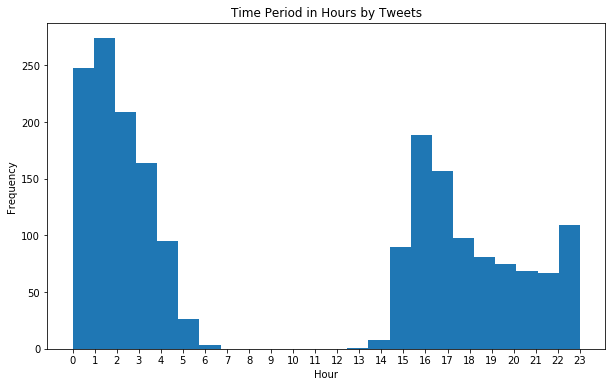

In [62]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Extract the hour from the timestamp and store it in a new column "hour"
df["hour"] = df["timestamp"].dt.hour

# Plot the frequency of tweets for each hour
plt.figure(figsize = (10, 6))
plt.hist(df["hour"], bins=24)
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.title("Time Period in Hours by Tweets")
plt.xticks(range(0, 24, 1))
plt.show()

According to the above graph, the majority of tweets occur between the hours of 0:00 and 5:00 and midday between 14 and 23, however tweet volume between 6 and 14 is extremely low. This indicates that there aren't almost any tweets during working hours.

### What are the most common dog breeds and dog breeds with the highest ratings as well as dog breeds with the lowest rating?

In [63]:
# Most common dog breeds
df.dog_breed.value_counts().head(10)

golden retriever      156
labrador retriever    103
pembroke               94
chihuahua              90
pug                    62
toy poodle             49
chow                   48
samoyed                41
pomeranian             41
malamute               33
Name: dog_breed, dtype: int64

In [64]:
# Dog breeds with the highest ratings (Top 10)
df["rating"] = df.rating_numerator / df.rating_denominator
highest_rating = df.groupby("dog_breed")["rating"].mean().sort_values(ascending=False).head(10)

highest_rating

dog_breed
clumber                        2.700000
soft-coated wheaten terrier    2.135714
west highland white terrier    1.468750
great pyrenees                 1.466667
chow                           1.416667
labrador retriever             1.373786
borzoi                         1.360000
siberian husky                 1.325000
bouvier des flandres           1.300000
pomeranian                     1.253659
Name: rating, dtype: float64

In [65]:
# Dog breeds with the lowest ratings (Bottom 10)
lowest_rating = df.groupby("dog_breed")["rating"].mean().sort_values(ascending=False).tail(10)

lowest_rating

dog_breed
dandie dinmont            0.957143
welsh springer spaniel    0.950000
boston bull               0.941667
dalmatian                 0.933333
maltese dog               0.931579
tibetan terrier           0.925000
ibizan hound              0.925000
scotch terrier            0.900000
walker hound              0.900000
japanese spaniel          0.500000
Name: rating, dtype: float64

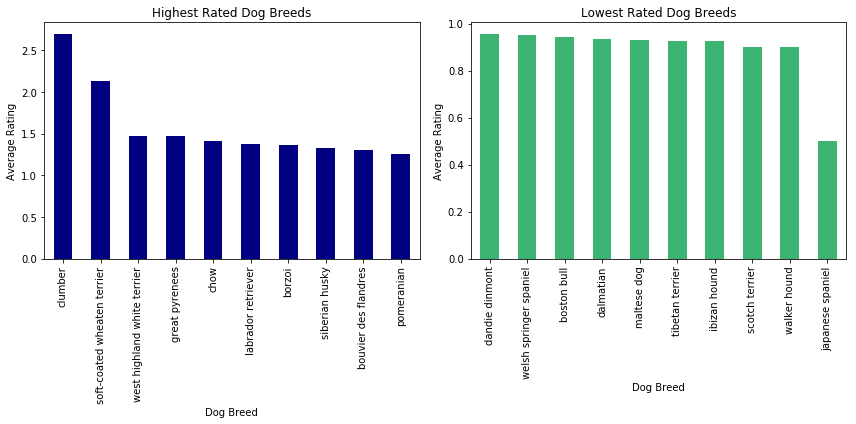

In [66]:
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

# Plot the highest rated dog breeds on the left subplot
highest_rating.plot(kind = "bar", ax = ax1, color = "navy")
ax1.set_title("Highest Rated Dog Breeds")
ax1.set_xlabel("Dog Breed")
ax1.set_ylabel("Average Rating")

# Plot the lowest rated dog breeds on the right subplot
lowest_rating.plot(kind = "bar", ax = ax2, color = "mediumseagreen")
ax2.set_title("Lowest Rated Dog Breeds")
ax2.set_xlabel("Dog Breed")
ax2.set_ylabel("Average Rating")

# Show the plot
plt.tight_layout()
plt.show()


Based on the right-hand chart, Clumber has the highest rating there with a 2.7. While the Pomeranian was ranked as the 10th best breed with 1.3 points. The chart on the left, however, displays the dog breeds with the lowest ratings. The Japanese Spaniel had the lowest rating of any dog breed with 0.5.

### What is the relationship between the numerical columns especially (favourite count and retweet count)?

In [67]:
# Calculate the correlation matrix of the dataset
corr = df.corr()

# Output correlation matrix "corr"
corr

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,display_text_length,dog_conf,hour,rating
tweet_id,1.000000,0.024922,NaN,0.611185,0.385310,-0.113147,0.100346,0.139947,0.024922
rating_numerator,0.024922,1.000000,NaN,0.016789,0.019118,-0.076104,0.038629,0.012584,1.000000
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorite_count,0.611185,0.016789,NaN,1.000000,0.929253,-0.090585,0.047275,0.048546,0.016789
retweet_count,0.385310,0.019118,NaN,0.929253,1.000000,-0.112744,0.018371,0.046524,0.019118
display_text_length,-0.113147,-0.076104,NaN,-0.090585,-0.112744,1.000000,-0.004997,0.035226,-0.076104
dog_conf,0.100346,0.038629,NaN,0.047275,0.018371,-0.004997,1.000000,0.019003,0.038629
hour,0.139947,0.012584,NaN,0.048546,0.046524,0.035226,0.019003,1.000000,0.012584
rating,0.024922,1.000000,NaN,0.016789,0.019118,-0.076104,0.038629,0.012584,1.000000


In [68]:
# Drop rating_denominator
corr.drop("rating_denominator", axis = 1, inplace = True)
corr.drop("rating_denominator", axis = 0, inplace = True)

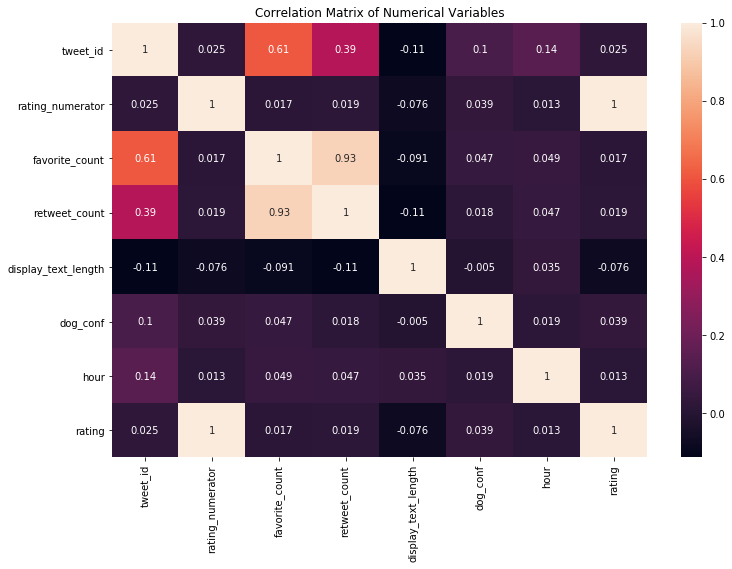

In [69]:
# Plot the heatmap for correlation matrix
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix of Numerical Variables")

# Show the plot
plt.show()

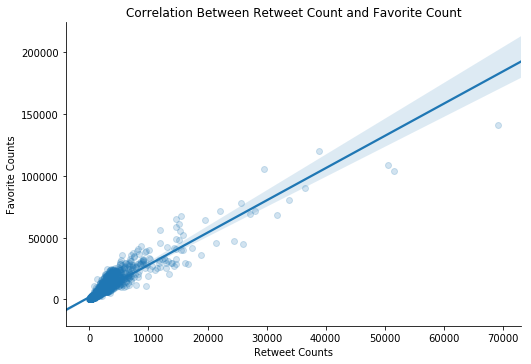

In [74]:
# Plot Scatter plot of favorite_count and retweet_count
sns.lmplot(x = "retweet_count", 
           y = "favorite_count", 
           data = df,
           size = 5,
           aspect = 1.5,
           scatter_kws = {"alpha":1/5})
plt.title("Correlation Between Retweet Count and Favorite Count")
plt.xlabel("Retweet Counts")
plt.ylabel("Favorite Counts")

# Show the plot
plt.show();

The heatmap demonstrates that most numerical variables have weak correlations with one another. Focusing on the correlation between the favourite count and the retweet count. The scatter plot indicates there is a strong positive correlation between these variables as they have correlation of 0.93 also shown in the heatmap.

### What is the distribution and relationship between dog stages and retweet count as well as favourite count?

In [71]:
# Group the data by dog breed and calculate the mean for retweet count and favorite count
df_grouped = df.groupby("dog_stage").mean().reset_index()
df_grouped

,dog_stage,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,display_text_length,dog_conf,hour,rating
0,doggo,7.970939e+17,11.870968,10.0,17094.838710,5836.919355,104.048387,0.508401,11.225806,1.187097
1,"doggo, floofer",8.540102e+17,11.000000,10.0,14345.000000,2741.000000,140.000000,0.354733,16.000000,1.100000
2,"doggo, pupper",7.747741e+17,11.000000,10.0,12349.000000,3649.125000,108.625000,0.803757,6.375000,1.100000
3,"doggo, puppo",8.558515e+17,13.000000,10.0,40240.000000,15580.000000,134.000000,0.321676,18.000000,1.300000
4,floofer,7.665514e+17,12.000000,10.0,10904.857143,3892.857143,112.000000,0.609204,7.857143,1.200000
5,pupper,7.187022e+17,10.716418,10.0,6070.805970,1880.144279,110.791045,0.586449,9.487562,1.071642
6,puppo,8.089964e+17,12.000000,10.0,18958.818182,5196.409091,111.363636,0.652581,12.090909,1.200000


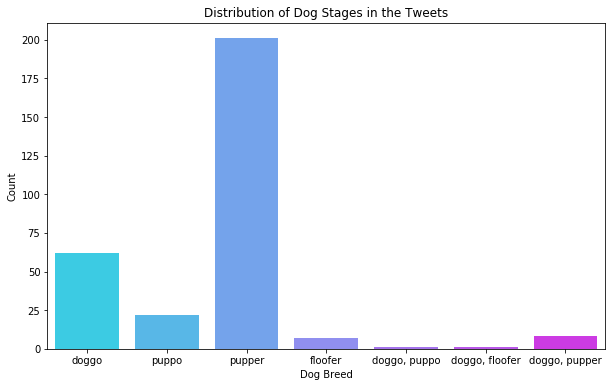

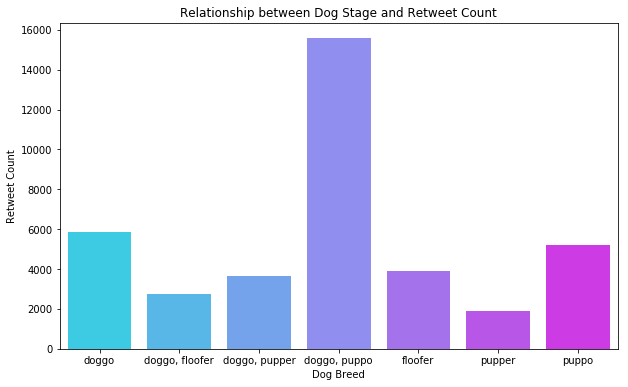

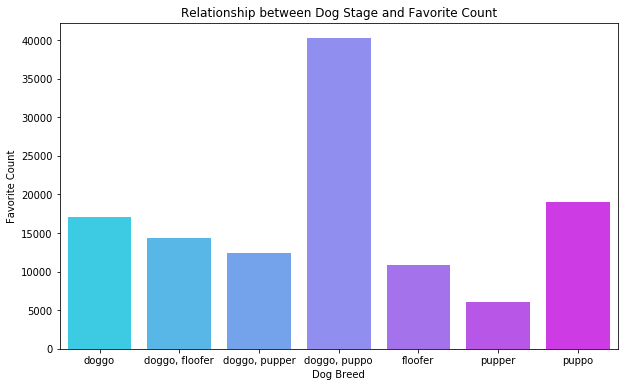

In [72]:
# Plot the distribution of dog breeds
plt.figure(figsize = (10,6))
sns.countplot(x = "dog_stage", palette = "cool", data = df)
plt.title("Distribution of Dog Stages in the Tweets")
plt.xlabel("Dog Breed")
plt.ylabel("Count")

# Show the plot
plt.show()

# Plot the relationship between dog breed and retweet count
plt.figure(figsize = (10,6))
sns.barplot(x = "dog_stage", y ="retweet_count", palette = "cool", data = df_grouped)
plt.title("Relationship between Dog Stage and Retweet Count")
plt.xlabel("Dog Breed")
plt.ylabel("Retweet Count")

# Show the plot
plt.show()

# Plot the relationship between dog breed and favorite count
plt.figure(figsize = (10,6))
sns.barplot(x = "dog_stage", y = "favorite_count", palette = "cool", data = df_grouped)
plt.title("Relationship between Dog Stage and Favorite Count")
plt.xlabel("Dog Breed")
plt.ylabel("Favorite Count")

# Show the plot
plt.show()

Fig. 1 shows the distribution of dog stages based on the above chart. This indicates that the most common dog stage is Pupper, Followed by Doggo. The chart's lowest distribution was recoded by Doggo, Pupper and Doggo, Floofer.


The relationship between dog stage and retweet count is also illustrated in Fig. 2. This shows that with 16,000 counts, Doggo, Puppo has the most retweets, followed by Doggo with 6,000. With roughly 2000 retweets, Pupper has the lowest number.


Fig. 3 also represents the relationship between the dog stage and favorite count. According to the graph, Doggo, Puppo had a 40,000 favorite count, while Pupper had a 6000 favorite count as the lowest recorded.

<a id="conclusion"></a>
<h2> Conclusion </h2>

The analysis of the WeRateDogs Twitter datasets found that there are specific patterns and trends in the dog-related content shared on the platform. It was discovered that the majority of tweets occur during the early hours of the day and in the evenings, with very little activity during working hours. This emphasizes how crucial it is to comprehend the habits and routines of the target audience when developing social media strategies.

The analysis also determined which dog breeds had the highest and lowest ratings, with Clumber having the highest rating and Japanese Spaniel having the lowest. Favorite count and retweet count have a strong positive connection, indicating that they are closely related metrics and that increasing either one will probably raise the other.

The analysis also looked at how dog phases are distributed and related to one another, as well as how they affect favorite and retweet counts. Pupper was found to be the most prevalent dog stage, followed by Doggo, with Doggo, Puppo and Doggo, Floofer having the lowest frequency, according to the findings. Doggo, Puppo received the most retweets and favorites.

In conclusion, social media managers and dog owners may use this study to better understand the concerns and trends on the WeRateDogs Twitter platform and provide more relevant and interesting content for their followers.
